In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv("Classified Data")
df.head(3)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [40]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values
y = df.iloc[:,-1].values

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
S_featr = scaler.transform(X)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [58]:
X_train, X_test, y_train, y_test = train_test_split(S_featr, y, test_size=0.20, random_state=20)

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [61]:
pred = knn.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[91 10]
 [ 9 90]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       101
           1       0.90      0.91      0.90        99

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [64]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

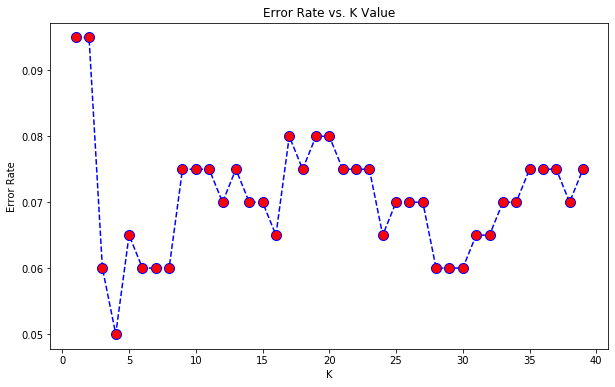

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)
pred1 = knn.predict(X_test)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[90 11]
 [ 4 95]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       101
           1       0.90      0.96      0.93        99

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200

